# CS-651-A TEXT BASED ANALYSIS
# Sai Vandana - 0939231
# Assignment - 7 5/11/2024

### To read the tweet_emotions.csv file

In [1]:
import pandas as pd
df = pd.read_csv(r'tweet_emotions.csv')
df.head(20)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


### The following code displays the first 400 characters of the content in the respective row of the DataFrame df.

In [2]:
print(repr(df.iloc[2666]["content"][0:400]))
print(repr(df.iloc[4726]["content"][0:400]))


"@KarenAnn_P i'm so sorry about that  i was really excited about it too! but i might continue posting externally, so fingers crossed!"
"trying to win tickets! com'on dc101..."


### The following code splits the content of each entry in the DataFrame df into paragraphs

In [3]:
import re
df["paragraphs"] = df["content"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)


### The following code initializes a TfidfVectorizer with a custom list of stop words, then fits and transforms the 'content' column of the DataFrame df into TF-IDF vectors, and finally prints the shape of the resulting TF-IDF matrix.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords

# Convert set of stop words to a list and preprocess them
stopwords = list(spacy_stopwords)

# Add common contractions if missing
additional_stop_words = ['ll', 've']  # Tokens mentioned in the warning
stopwords.extend(additional_stop_words)

# Initialize TfidfVectorizer with the modified list of stop words
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)

# Fit and transform the data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['content'])

# Output the shape of the resulting matrix
print(tfidf_text_vectors.shape)

(40000, 5650)


### This code creates a new DataFrame paragraph_df by extracting and flattening the 'content', 'sentiment', and 'tweet_id' columns from df, filtering out rows with empty 'content', and then displays the first 10 rows of the resulting DataFrame.

In [6]:

paragraph_df = pd.DataFrame([{ "content": content, "sentiment": sentiment, "tweet_id": tweet_id } 
                               for content, sentiment, tweet_id in zip(df["content"], df["sentiment"], df["tweet_id"]) 
                                    if content])

# Display the first 10 rows of the flattened DataFrame
print(paragraph_df.head(10))

                                             content   sentiment    tweet_id
0  @tiffanylue i know  i was listenin to bad habi...       empty  1956967341
1  Layin n bed with a headache  ughhhh...waitin o...     sadness  1956967666
2                Funeral ceremony...gloomy friday...     sadness  1956967696
3               wants to hang out with friends SOON!  enthusiasm  1956967789
4  @dannycastillo We want to trade with someone w...     neutral  1956968416
5  Re-pinging @ghostridah14: why didn't you go to...       worry  1956968477
6  I should be sleep, but im not! thinking about ...     sadness  1956968487
7               Hmmm. http://www.djhero.com/ is down       worry  1956968636
8            @charviray Charlene my love. I miss you     sadness  1956969035
9         @kelcouch I'm sorry  at least it's Friday?     sadness  1956969172


### This code initializes a TfidfVectorizer with specified stop words and frequency thresholds, fits it to the 'content' column of paragraph_df, transforms the text data into TF-IDF vectors, and outputs the shape of the resulting TF-IDF matrix.

In [7]:
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["content"])
tfidf_para_vectors.shape

(40000, 5650)

### This code initializes an NMF model with 10 components and a maximum of 500 iterations, then fits it to the TF-IDF vectors, resulting in the document-topic matrix W_text_matrix and the topic-term matrix H_text_matrix.

In [8]:
from sklearn.decomposition import NMF

# Initialize the NMF model with a higher number of iterations
nmf_text_model = NMF(n_components=10, random_state=42, max_iter=500)

# Fit the model to your TF-IDF vectors
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_


### This code defines a function display_topics to print the top words for each topic in an NMF model, displaying each word with its percentage contribution, and then calls this function using nmf_text_model and the feature names obtained from the TF-IDF vectorizer

In [9]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            # Updated to use the correct method for getting feature names
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

# Use get_feature_names_out() instead of get_feature_names()
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  day (18.19)
  happy (14.49)
  mother (8.23)
  mothers (8.21)
  mom (2.30)

Topic 01
  going (2.98)
  today (1.97)
  got (1.77)
  home (1.70)
  time (1.48)

Topic 02
  http (12.37)
  com (11.52)
  twitpic (7.39)
  tinyurl (2.51)
  plurk (2.08)

Topic 03
  good (22.30)
  morning (10.39)
  night (2.30)
  luck (1.54)
  hope (1.22)

Topic 04
  quot (23.96)
  watching (0.65)
  said (0.60)
  amp (0.58)
  movie (0.58)

Topic 05
  thanks (33.37)
  follow (2.28)
  following (1.22)
  haha (1.05)
  lol (0.97)

Topic 06
  work (28.59)
  tomorrow (1.49)
  want (1.14)
  ready (0.97)
  weekend (0.90)

Topic 07
  love (21.04)
  thank (1.67)
  mom (1.35)
  lol (1.00)
  amp (0.76)

Topic 08
  know (11.33)
  don (7.59)
  want (3.82)
  think (1.84)
  let (1.20)

Topic 09
  like (15.54)
  feel (3.63)
  looks (1.63)
  sounds (0.98)
  look (0.92)


### This code initializes an NMF model with 10 components, fits it to the TF-IDF vectors from paragraph_df, generates the document-topic and topic-term matrices (W_para_matrix and H_para_matrix), and then calls display_topics to print the top words for each topic using the feature names from the TF-IDF vectorizer.

In [10]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
# Corrected function call using the updated method for getting feature names
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
  day (18.19)
  happy (14.49)
  mother (8.23)
  mothers (8.21)
  mom (2.30)

Topic 01
  going (2.98)
  today (1.97)
  got (1.77)
  home (1.70)
  time (1.48)

Topic 02
  http (12.37)
  com (11.52)
  twitpic (7.39)
  tinyurl (2.51)
  plurk (2.08)

Topic 03
  good (22.30)
  morning (10.39)
  night (2.30)
  luck (1.54)
  hope (1.22)

Topic 04
  quot (23.96)
  watching (0.65)
  said (0.60)
  amp (0.58)
  movie (0.58)

Topic 05
  thanks (33.37)
  follow (2.28)
  following (1.22)
  haha (1.05)
  lol (0.97)

Topic 06
  work (28.59)
  tomorrow (1.49)
  want (1.14)
  ready (0.97)
  weekend (0.90)

Topic 07
  love (21.04)
  thank (1.67)
  mom (1.35)
  lol (1.00)
  amp (0.76)

Topic 08
  know (11.33)
  don (7.59)
  want (3.82)
  think (1.84)
  let (1.20)

Topic 09
  like (15.54)
  feel (3.63)
  looks (1.63)
  sounds (0.98)
  look (0.92)


### This code calculates the percentage distribution of each topic across all documents by summing the topic proportions in W_text_matrix along the axis 0, normalizing by the total sum, and then multiplying by 100.

In [11]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0


array([ 9.819695  , 15.85372455,  9.07225518, 10.58532601,  6.84838004,
        6.3991632 ,  7.34973502,  8.90105031, 13.95011917, 11.22055153])

### This code calculates the percentage distribution of each topic across all paragraphs by summing the topic proportions in W_para_matrix along axis 0, normalizing by the total sum, and then multiplying by 100.

In [12]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0


array([ 9.819695  , 15.85372455,  9.07225518, 10.58532601,  6.84838004,
        6.3991632 ,  7.34973502,  8.90105031, 13.95011917, 11.22055153])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["content"])
count_para_vectors.shape
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [15]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


Topic 00
  oh (4.37)
  wait (2.07)
  week (1.94)
  didn (1.89)
  come (1.64)

Topic 01
  amp (3.27)
  lol (2.28)
  having (1.38)
  im (1.33)
  sucks (1.21)

Topic 02
  day (15.79)
  happy (7.61)
  mother (3.35)
  mothers (2.92)
  bit (2.49)

Topic 03
  good (8.79)
  http (7.08)
  com (6.60)
  twitpic (2.58)
  morning (1.88)

Topic 04
  new (2.60)
  yes (2.11)
  old (1.56)
  bored (1.32)
  star (1.30)

Topic 05
  sad (2.95)
  work (2.79)
  bad (2.01)
  got (1.46)
  sick (1.43)

Topic 06
  going (4.27)
  today (3.40)
  home (2.72)
  tonight (2.50)
  work (1.43)

Topic 07
  quot (6.44)
  don (4.70)
  know (4.50)
  think (3.09)
  twitter (2.76)

Topic 08
  thanks (4.01)
  sorry (2.28)
  miss (2.03)
  fun (1.92)
  im (1.90)

Topic 09
  got (2.58)
  better (2.44)
  haha (1.69)
  want (1.44)
  need (1.39)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=stopwords,min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["content"])
count_para_vectors.shape


(40000, 5650)

In [18]:
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_


In [19]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


Topic 00
  oh (4.37)
  wait (2.07)
  week (1.94)
  didn (1.89)
  come (1.64)

Topic 01
  amp (3.27)
  lol (2.28)
  having (1.38)
  im (1.33)
  sucks (1.21)

Topic 02
  day (15.79)
  happy (7.61)
  mother (3.35)
  mothers (2.92)
  bit (2.49)

Topic 03
  good (8.79)
  http (7.08)
  com (6.60)
  twitpic (2.58)
  morning (1.88)

Topic 04
  new (2.60)
  yes (2.11)
  old (1.56)
  bored (1.32)
  star (1.30)

Topic 05
  sad (2.95)
  work (2.79)
  bad (2.01)
  got (1.46)
  sick (1.43)

Topic 06
  going (4.27)
  today (3.40)
  home (2.72)
  tonight (2.50)
  work (1.43)

Topic 07
  quot (6.44)
  don (4.70)
  know (4.50)
  think (3.09)
  twitter (2.76)

Topic 08
  thanks (4.01)
  sorry (2.28)
  miss (2.03)
  fun (1.92)
  im (1.90)

Topic 09
  got (2.58)
  better (2.44)
  haha (1.69)
  want (1.44)
  need (1.39)


In [20]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([10.01921451,  9.25596788,  8.64550394,  8.88537969,  9.05751569,
       10.55321351, 11.8280998 , 11.09034055, 11.23786741,  9.426897  ])

In [21]:
!pip install pyLDAvis
!pip install pyLDAvis scikit-learn

In [22]:
!pip install pyLDAvis scikit-learn

In [23]:
!pip install pyLDAvis gensim

In [24]:
!pip install pyLDAvis
!pip install scikit-learn

In [25]:
!pip install pyLDAvis scikit-learn pandas numpy


In [26]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
from gensim import corpora

### This code creates a Gensim dictionary and corpus from the paragraph_df content, trains an LDA model with 10 topics, and then visualizes the topics using pyLDAvis within a notebook environment.

In [28]:
import gensim
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Create a Gensim dictionary
id2word = corpora.Dictionary(paragraph_df["content"].apply(lambda x: x.split()))

# Convert the count vectors to a Gensim corpus
corpus = gensim.matutils.Sparse2Corpus(count_para_vectors, documents_columns=False)

# Define the number of topics
num_topics = 10

# Create and train the Gensim LDA model
lda_para_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Enable pyLDAvis in the notebook
pyLDAvis.enable_notebook()

# Prepare the visualization with pyLDAvis using Gensim data
lda_display = gensimvis.prepare(lda_para_model, corpus, id2word, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_display)

### This code defines a function wordcloud_topics to generate and display word clouds for each topic in a given model, showing the top 40 words by their absolute values, and optionally saves each word cloud as an image file

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1]  # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
            
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(8, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')
        plt.show() 

C:\Users\tsaiv\AppData\Local\Temp\ipykernel_15680\2901694772.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


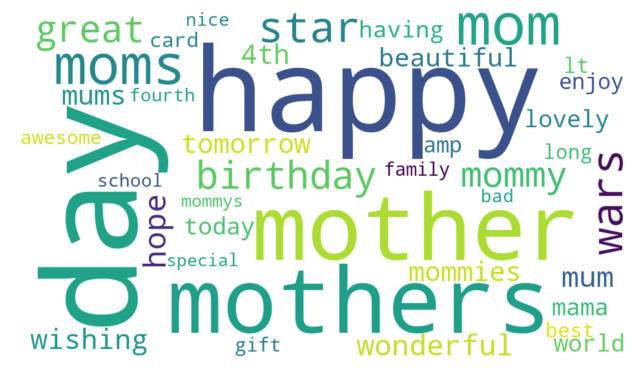

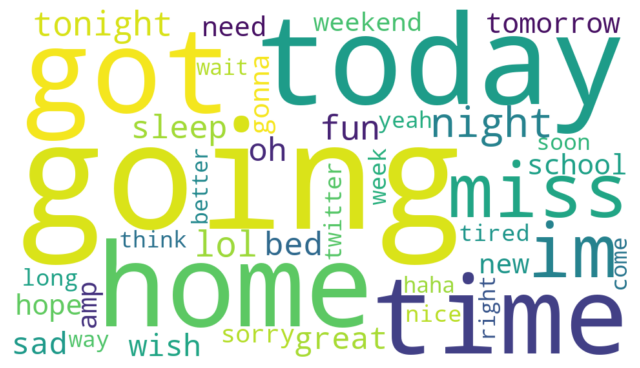

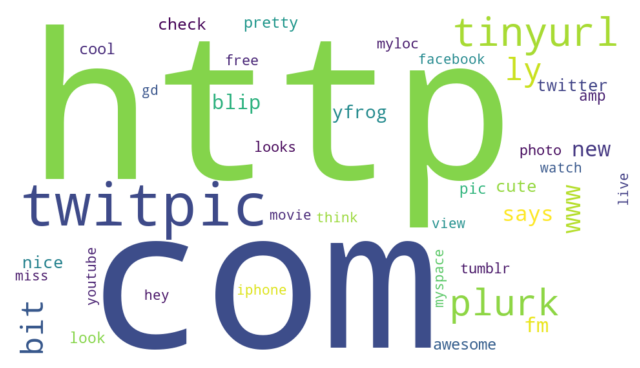

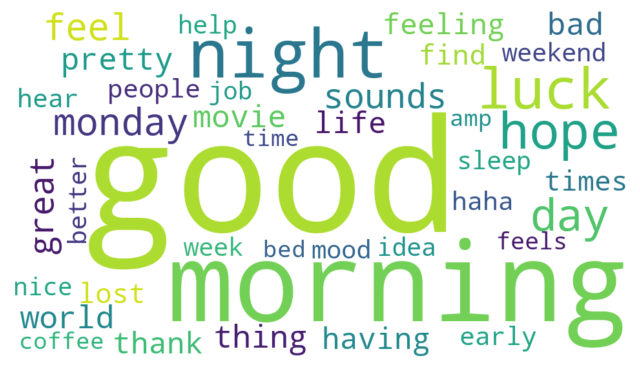

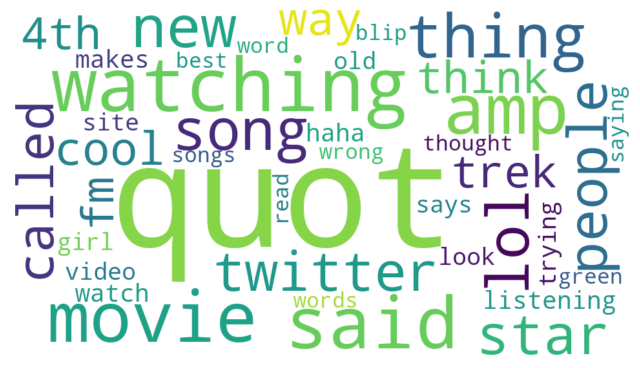

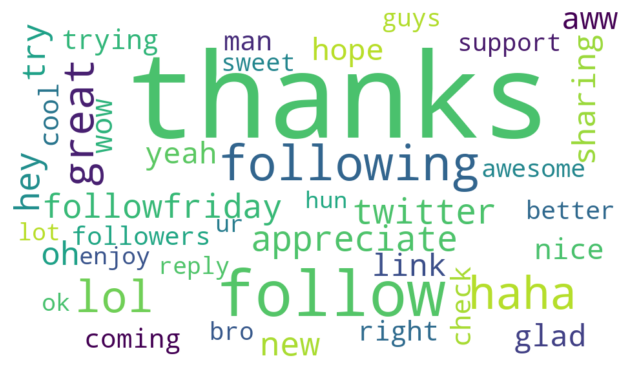

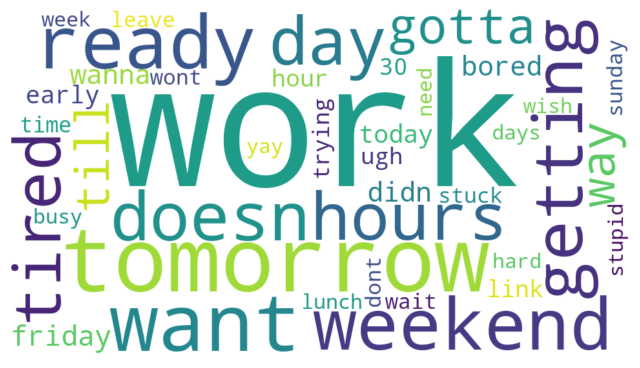

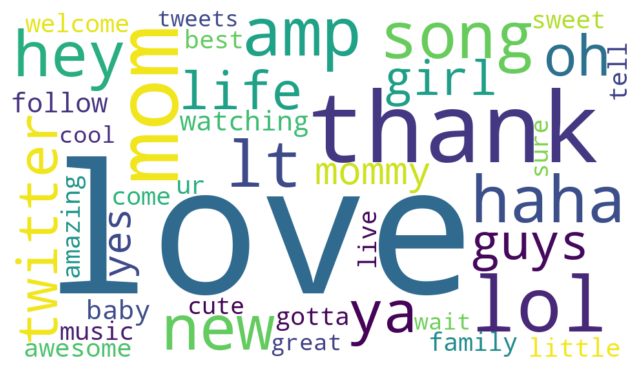

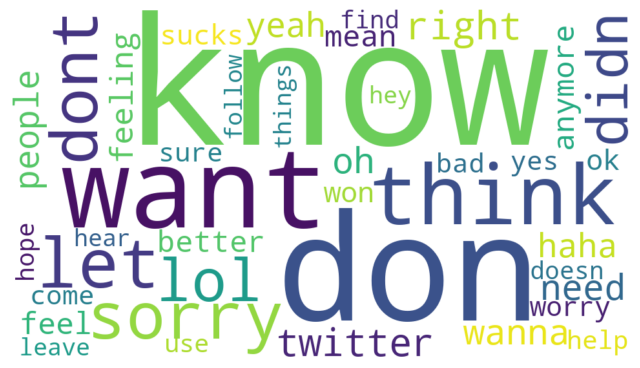

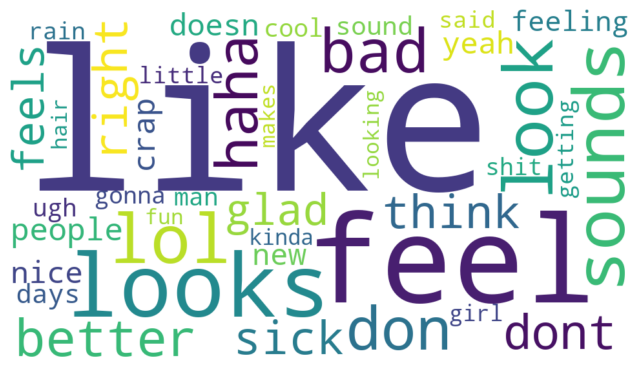

In [30]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

### This code defines a function wordcloud_topics to generate and display word clouds for each topic in a given Gensim LDA model, showing the top 40 words by their absolute weights, and optionally saves each word cloud as an image file; it also adjusts the notebook's output scroll height for better visibility.

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML  # Updated import statement

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic in range(model.num_topics):
        topic_words = model.get_topic_terms(topic, topn=no_top_words)
        size = {features[word_id]: abs(weight) for word_id, weight in topic_words}
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(8, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')
        plt.show()

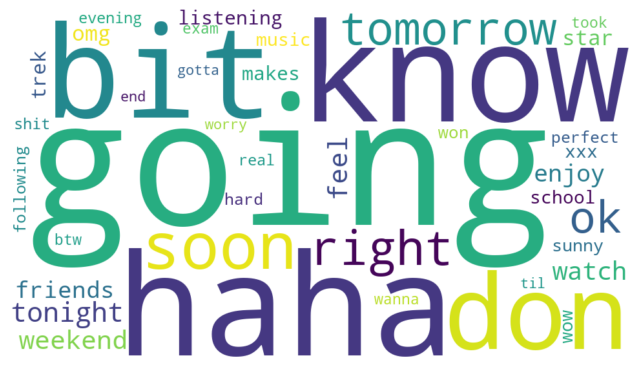

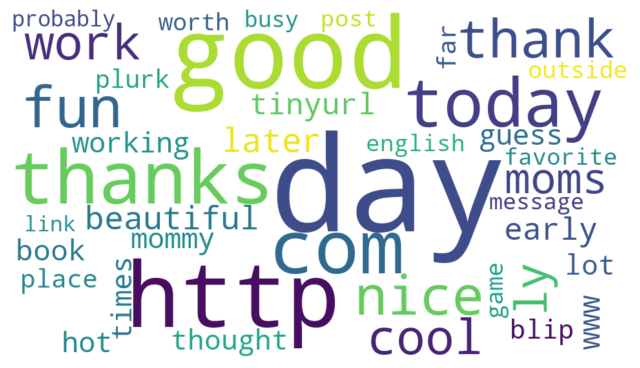

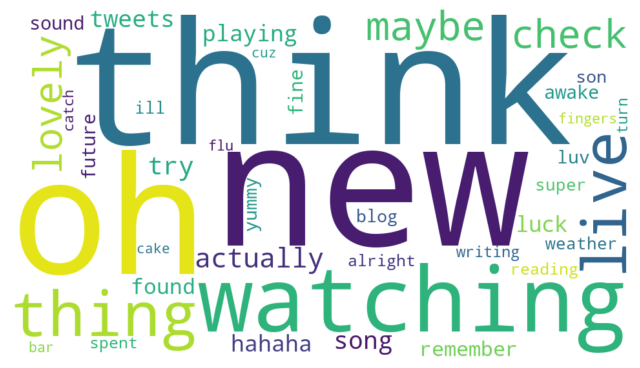

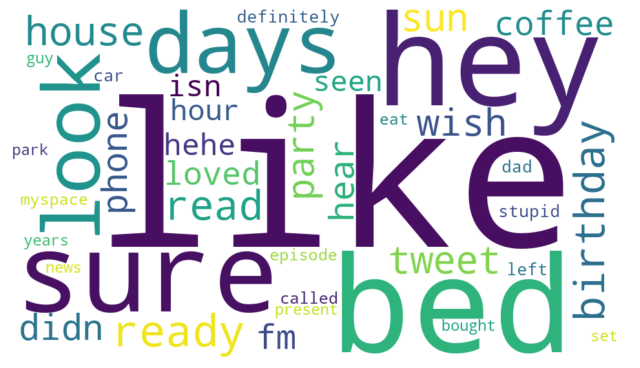

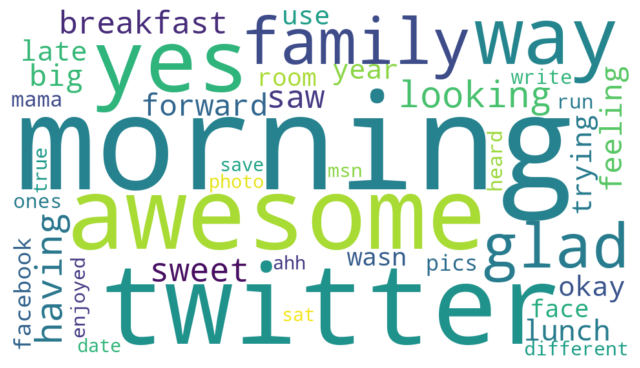

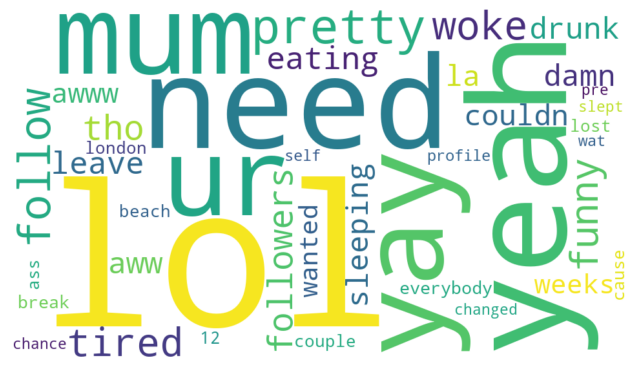

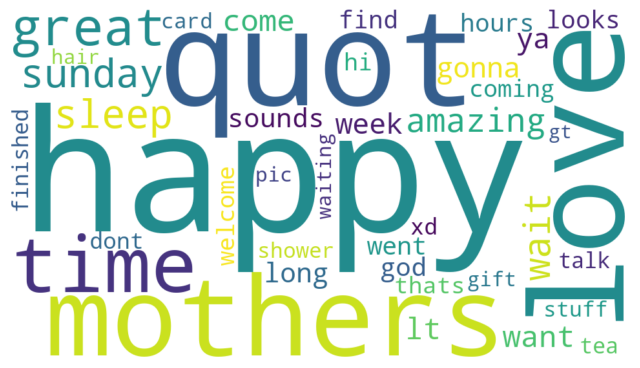

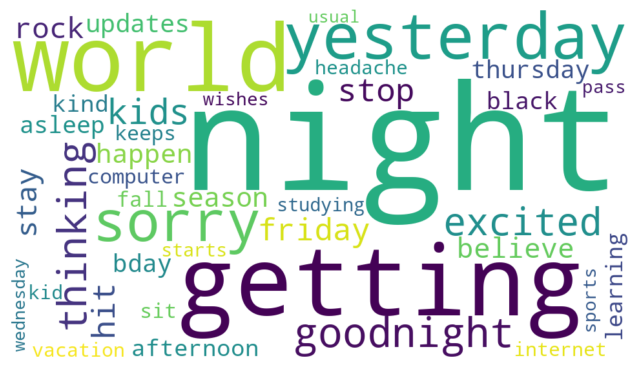

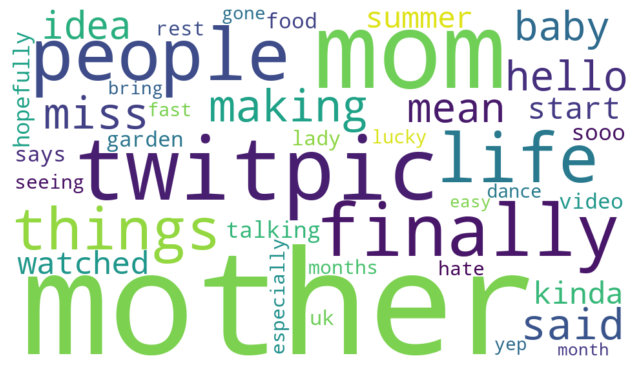

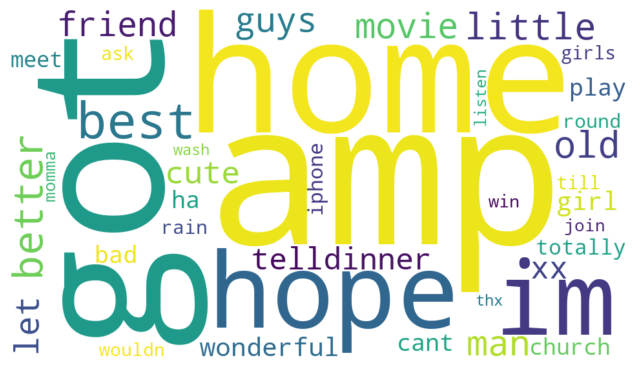

In [32]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())



### This code generates a list of topic names by concatenating the two most significant words for each topic in an NMF model, derived from the model's components and the feature names of the TF-IDF vectorizer.

In [33]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

### This code calculates the average topic distribution for each sentiment category by transforming the TF-IDF vectors with an NMF model, aggregates the results into a DataFrame, and displays the average topic distribution for each sentiment.

In [39]:
# Now we calculate the average sentiment distribution
sentiment_data = []
unique_sentiments = paragraph_df['sentiment'].unique()

for sentiment in tqdm(unique_sentiments):
    # Transform the TF-IDF vectors for the tweets of the given sentiment using the NMF model
    W_sentiment = nmf_para_model.transform(tfidf_para_vectors[paragraph_df['sentiment'] == sentiment])
    
    # Calculate the average topic distribution for the sentiment
    sentiment_avg_topic_dist = W_sentiment.sum(axis=0) / W_sentiment.sum() * 100.0
    
    # Append the sentiment and the average topic distribution to the sentiment_data list
    sentiment_data.append([sentiment] + list(sentiment_avg_topic_dist))

# Convert sentiment_data to a DataFrame
sentiment_data_df = pd.DataFrame(sentiment_data, columns=["sentiment"] + [f"topic_{i}" for i in range(len(sentiment_avg_topic_dist))])

# Display the DataFrame
print(sentiment_data_df)

C:\Users\tsaiv\anaconda3\anaconda jupyter\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\tsaiv\anaconda3\anaconda jupyter\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\tsaiv\anaconda3\anaconda jupyter\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\tsaiv\anaconda3\anaconda jupyter\Lib\site-packages\ipywidgets\widgets\widget.py:528: Deprec

  0%|          | 0/13 [00:00<?, ?it/s]

     sentiment    topic_0    topic_1    topic_2    topic_3    topic_4  \
0        empty   4.438363  15.676353  15.864661   9.011463   8.564746   
1      sadness   6.460858  22.022266   6.278925   7.555913   6.342566   
2   enthusiasm   6.179996  16.425561   9.881324  15.809822   8.317289   
3      neutral   6.138206  15.519369  13.862454  10.542323   7.583518   
4        worry   5.668913  19.411887   6.851016   9.517795   5.883189   
5     surprise   7.744988  16.146686   9.578307   8.695091  11.555687   
6         love  21.952153   7.957839   7.322260   8.836036   5.126810   
7          fun   5.605066  17.310071  12.790852  10.793291   9.892308   
8         hate   4.119721  17.349405   8.084144   6.449840   7.450539   
9    happiness  14.082545  13.956851   8.584889  16.376620   6.601664   
10     boredom   5.031776  22.438315   3.150994   4.879781   3.144286   
11      relief   9.594747  16.894105   5.968923  12.153090   5.864254   
12       anger   3.080238  15.341543  10.338238   7

### This code generates and customizes an area plot to visualize the sentiment distribution across topics from the DataFrame sentiment_data_df.

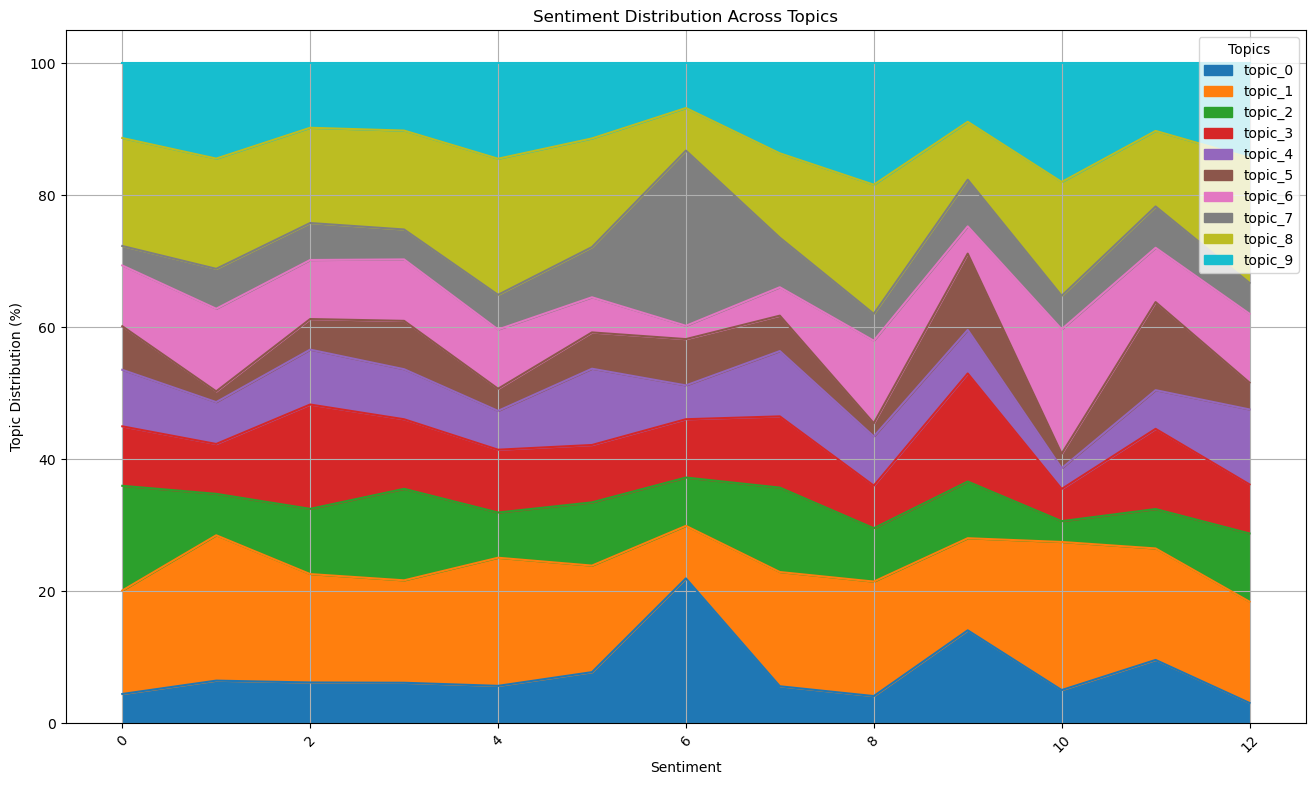

In [41]:

# Plot the data as an area plot
fig, ax = plt.subplots(figsize=(16, 9))
sentiment_data_df.plot.area(ax=ax)

# Customize the plot
plt.title("Sentiment Distribution Across Topics")
plt.xlabel("Sentiment")
plt.ylabel("Topic Distribution (%)")
plt.legend(title="Topics")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()